# 単発テスト

In [1]:
# sapnet.pyをインポート
from sapnet4 import sapnet

# 準備
df = sapnet.example_dataframe()

# ハイパーパラメータ
stimulus = 1
first_stimulus_value = 1.0

# 計算
df = sapnet.stimulus_calc(df,stimulus,first_stimulus_value)

DEBUG : (0/8)Generating dataframe for dataframe.
DEBUG : (0/8)Converting array to DataFrame
INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 4], [1, 3]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 4], [2, 3]]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next

In [2]:
print(df)

          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1          1.1     0.100000     0.300000     0.200000
1  knowledge_2          0.1     0.401612     0.300000     0.200000
2  knowledge_3          0.3     0.300000     0.421419     0.000000
3  knowledge_4          0.2     0.200000     0.000000     0.455223


# 複数テスト

In [3]:
# sapnet.pyをインポート
from sapnet4 import sapnet

# 準備
df = sapnet.example_dataframe()

# ハイパーパラメータ
stimulus = 1
first_stimulus_value = 1.0

# 計算
for i in range(4):
    df = sapnet.stimulus_calc(df,i+1,first_stimulus_value)

DEBUG : (0/8)Generating dataframe for dataframe.
DEBUG : (0/8)Converting array to DataFrame
INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 4], [1, 3]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 4], [2, 3]]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next

In [4]:
print(df)

          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1     2.181387     0.100000     0.300000     0.200000
1  knowledge_2     0.100000     2.416577     0.300000     0.200000
2  knowledge_3     0.300000     0.300000     1.874417     0.000000
3  knowledge_4     0.200000     0.200000     0.000000     1.942025


In [5]:
# 形式の変換を行うプログラム実験

# sapnet.pyをインポート
from sapnet4 import sapnet

# sapnetクラスのexample_dataframeメソッドを直接呼び出してDataFrameを取得
example_data = sapnet.example_data()
example_df = sapnet.array4DataFrame(example_data)
return_data = sapnet.DataFrame4array(example_df)

print(example_data)
print(example_df)
print(return_data)

print(example_data == return_data)

DEBUG : (0/8)Generating dataframe for array.
DEBUG : (0/8)Converting array to DataFrame
DEBUG : (0/8)Generating dataframe for array.
[['knowledge_1', 0.1, 0.1, 0.3, 0.2], ['knowledge_2', 0.1, 0.1, 0.3, 0.2], ['knowledge_3', 0.3, 0.3, 0.1, 0], ['knowledge_4', 0.2, 0.2, 0, 0.1]]
          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1          0.1          0.1          0.3          0.2
1  knowledge_2          0.1          0.1          0.3          0.2
2  knowledge_3          0.3          0.3          0.1          0.0
3  knowledge_4          0.2          0.2          0.0          0.1
[['knowledge_1', 0.1, 0.1, 0.3, 0.2], ['knowledge_2', 0.1, 0.1, 0.3, 0.2], ['knowledge_3', 0.3, 0.3, 0.1, 0.0], ['knowledge_4', 0.2, 0.2, 0.0, 0.1]]
True


P-SAPとの比較

In [6]:
# sapnet.pyをインポート
from sapnet4 import sapnet

# 準備
df = sapnet.example_dataframe()

# ハイパーパラメータ
stimulus = 1
first_stimulus_value = 1.0

# 計算
df = sapnet.stimulus_calc(df,stimulus,first_stimulus_value)

DEBUG : (0/8)Generating dataframe for dataframe.
DEBUG : (0/8)Converting array to DataFrame
INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 4], [1, 3]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 4], [2, 3]]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next

In [7]:
print(df)

          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1          1.1     0.100000     0.300000     0.200000
1  knowledge_2          0.1     0.401612     0.300000     0.200000
2  knowledge_3          0.3     0.300000     0.421419     0.000000
3  knowledge_4          0.2     0.200000     0.000000     0.455223


# 10ノードでの活性化

In [8]:
# sapnet.pyをインポート
from sapnet4 import sapnet

# 準備
data = [
                ["knowledge", 0, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9],
                ["knowledge", 0.5, 0, 0.5, 0.5, 0.7, 0.7, 0, 0, 1.0, 1.0],
                ["knowledge", 0.6, 0.5, 0, 0, 0.5, 0, 0.7, 0, 0.9, 0],
                ["knowledge", 0.6, 0.5, 0, 0, 0, 0.5, 0, 0.7, 0, 0.9],
                ["knowledge",0.7, 0.7, 0.5, 0, 0, 0, 0.5, 0, 0.7, 0],
                ["knowledge",0.7, 0.7, 0, 0.5, 0, 0, 0, 0.5, 0, 0.7],
                ["knowledge",0.8, 0, 0.7, 0, 0.5, 0, 0, 0, 0.5, 0],
                ["knowledge",0.8, 0, 0, 0.7, 0, 0.5, 0, 0, 0, 0.5],  
                ["knowledge",0.9, 1.0, 0.9, 0, 0.7, 0, 0.5, 0, 0, 0],
                ["knowledge",0.9, 1.0, 0, 0.9, 0, 0.7, 0, 0.5, 0, 0]]
df = sapnet.array4DataFrame(data)


# ハイパーパラメータ
stimulus = 1
first_stimulus_value = 1.0

# 計算
df = sapnet.stimulus_calc(df,stimulus,first_stimulus_value)

DEBUG : (0/8)Converting array to DataFrame
INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 5] [5, 1]
DEBUG : (3/8)Removing already pairs [1, 6] [6, 1]
DEBUG : (3/8)Removing already pairs [1, 7] [7, 1]
DEBUG : (3/8)Removing already pairs [1, 8] [8, 1]
DEBUG : (3/8)Removing already pairs [1, 9] [9, 1]
DEBUG : (3/8)Removing already pairs [1, 10] [10, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 3], [2, 4], [2, 5], [2, 6], [2, 9], [2, 10]]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/

In [9]:
print(df)

           name  knowledge_1  knowledge_2  knowledge_3  knowledge_4   
0   knowledge_1          1.0     0.500000     0.600000     0.600000  \
1   knowledge_2          0.5     0.067392     0.500000     0.500000   
2   knowledge_3          0.6     0.500000     0.066818     0.000000   
3   knowledge_4          0.6     0.500000     0.000000     0.066818   
4   knowledge_5          0.7     0.700000     0.500000     0.000000   
5   knowledge_6          0.7     0.700000     0.000000     0.500000   
6   knowledge_7          0.8     0.000000     0.700000     0.000000   
7   knowledge_8          0.8     0.000000     0.000000     0.700000   
8   knowledge_9          0.9     1.000000     0.900000     0.000000   
9  knowledge_10          0.9     1.000000     0.000000     0.900000   

   knowledge_5  knowledge_6  knowledge_7  knowledge_8  knowledge_9   
0     0.700000     0.700000     0.800000     0.800000     0.900000  \
1     0.700000     0.700000     0.000000     0.000000     1.000000   
2     0.

10パーセント減衰

In [10]:
result_df = sapnet.attenuation(df,0.1) #0.1のため10%を削る減衰関数
print(result_df)

           name  knowledge_1  knowledge_2  knowledge_3  knowledge_4   
0   knowledge_1          0.9     0.500000     0.600000     0.600000  \
1   knowledge_2          0.5     0.060653     0.500000     0.500000   
2   knowledge_3          0.6     0.500000     0.060137     0.000000   
3   knowledge_4          0.6     0.500000     0.000000     0.060137   
4   knowledge_5          0.7     0.700000     0.500000     0.000000   
5   knowledge_6          0.7     0.700000     0.000000     0.500000   
6   knowledge_7          0.8     0.000000     0.700000     0.000000   
7   knowledge_8          0.8     0.000000     0.000000     0.700000   
8   knowledge_9          0.9     1.000000     0.900000     0.000000   
9  knowledge_10          0.9     1.000000     0.000000     0.900000   

   knowledge_5  knowledge_6  knowledge_7  knowledge_8  knowledge_9   
0     0.700000     0.700000     0.800000     0.800000     0.900000  \
1     0.700000     0.700000     0.000000     0.000000     1.000000   
2     0.

グラフ表示

[0.9        0.06065307 0.06013658 0.06013658 0.05459882 0.05459882
 0.04553218 0.04553218 0.04434692 0.04434692]
<class 'numpy.ndarray'>


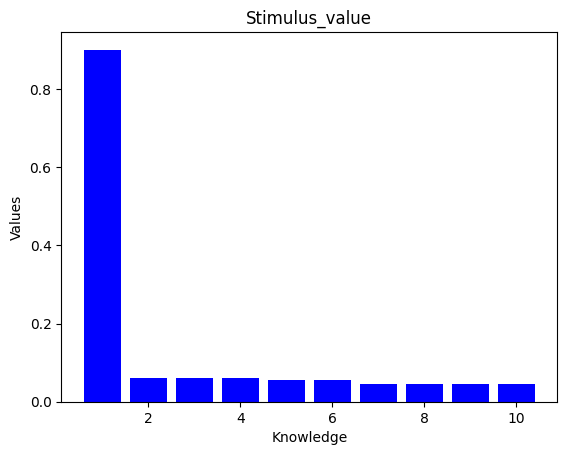

In [11]:
sapnet.graph_show(result_df)

In [12]:
for i in range(4):
    df = sapnet.stimulus_calc(df,i+1,first_stimulus_value)

INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 5] [5, 1]
DEBUG : (3/8)Removing already pairs [1, 6] [6, 1]
DEBUG : (3/8)Removing already pairs [1, 7] [7, 1]
DEBUG : (3/8)Removing already pairs [1, 8] [8, 1]
DEBUG : (3/8)Removing already pairs [1, 9] [9, 1]
DEBUG : (3/8)Removing already pairs [1, 10] [10, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 3], [2, 4], [2, 5], [2, 6], [2, 9], [2, 10]]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 5] [5, 2]
DEBU

複数回テスト・P-SAP比較

In [13]:
# sapnet.pyをインポート
from sapnet4 import sapnet

# 準備
df = sapnet.example_dataframe()

# ハイパーパラメータ
stimulus = 1
first_stimulus_value = 0.1

# 計算
for i in range(4):
    df = sapnet.stimulus_calc(df,i+1,first_stimulus_value)

DEBUG : (0/8)Generating dataframe for dataframe.
DEBUG : (0/8)Converting array to DataFrame
INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 4], [1, 3]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 4], [2, 3]]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next

In [14]:
print(df)

          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1     0.308139     0.100000     0.300000     0.200000
1  knowledge_2     0.100000     0.331658     0.300000     0.200000
2  knowledge_3     0.300000     0.300000     0.277442     0.000000
3  knowledge_4     0.200000     0.200000     0.000000     0.284202


In [15]:
df = sapnet.stimulus_calc(df,1,first_stimulus_value)

INFO  : Sapnet's algorithm, Start the calculations.
INFO  : (1/8)Generating stimulus pair list for stimulus 1
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[1, 2], [1, 4], [1, 3]]
DEBUG : (3/8)Removing already pairs [1, 2] [2, 1]
DEBUG : (3/8)Removing already pairs [1, 4] [4, 1]
DEBUG : (3/8)Removing already pairs [1, 3] [3, 1]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[2, 1], [2, 4], [2, 3]]
DEBUG : (3/8)Removing already pairs [2, 4] [4, 2]
DEBUG : (3/8)Removing already pairs [2, 3] [3, 2]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[4, 1], [4, 2]]
DEBUG : (2/8)Calculating next_Allpair
DEBUG : (2/8)Calculating next_Allpair [[3, 1], [3, 2]]
INFO  : (3/8)Generating stimulus pair list [[1, 2], [1, 4], [1, 3]

          name  knowledge_1  knowledge_2  knowledge_3  knowledge_4
0  knowledge_1     0.408139     0.100000     0.300000     0.200000
1  knowledge_2     0.100000     0.361819     0.300000     0.200000
2  knowledge_3     0.300000     0.300000     0.309584     0.000000
3  knowledge_4     0.200000     0.200000     0.000000     0.319725
[0.4081387  0.36181891 0.30958362 0.31972481]
<class 'numpy.ndarray'>


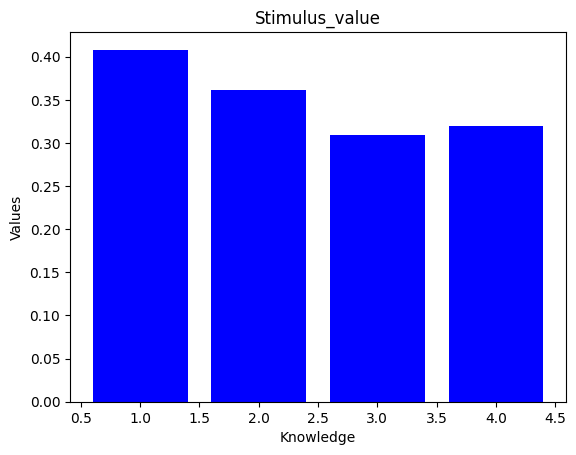

In [16]:
print(df)
sapnet.graph_show(df)